##### Отправляем сообщения всегда, но узел может быть не активен (блокирован) тогда сообщение ставится в очередь на узел
##### после блокировки узел считается снова свободным если очередь < L*0,5
MultiplierThresholdToBlock 50, FractionThresholdToUnBlock 0,5, UseOnlyIsActiveNodes True, NumberOfGenerations 120 <br>
<strong>Поток Quantity 100 </strong>

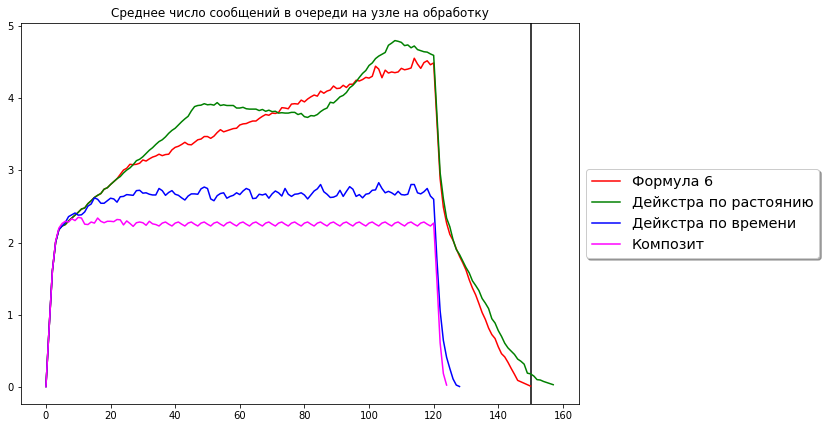

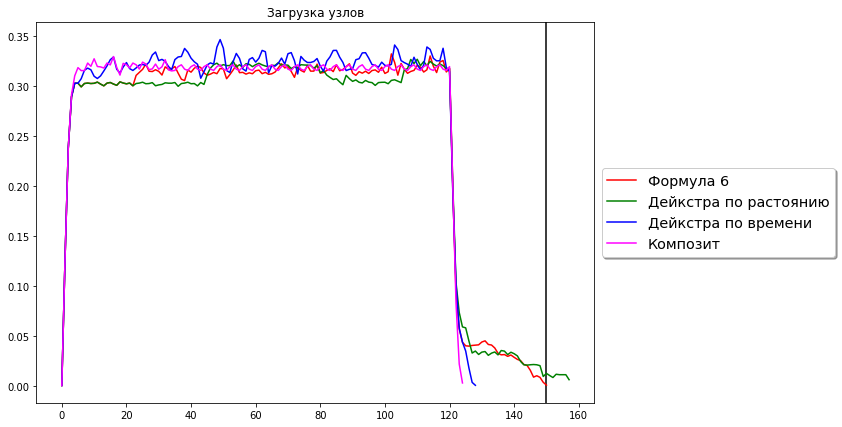

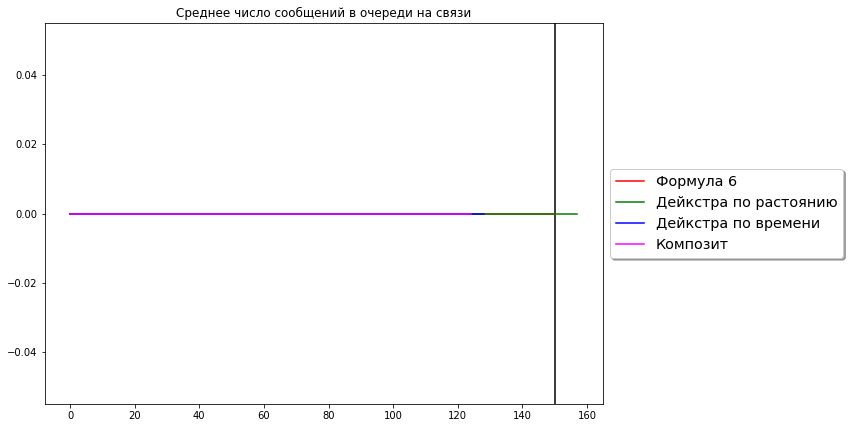

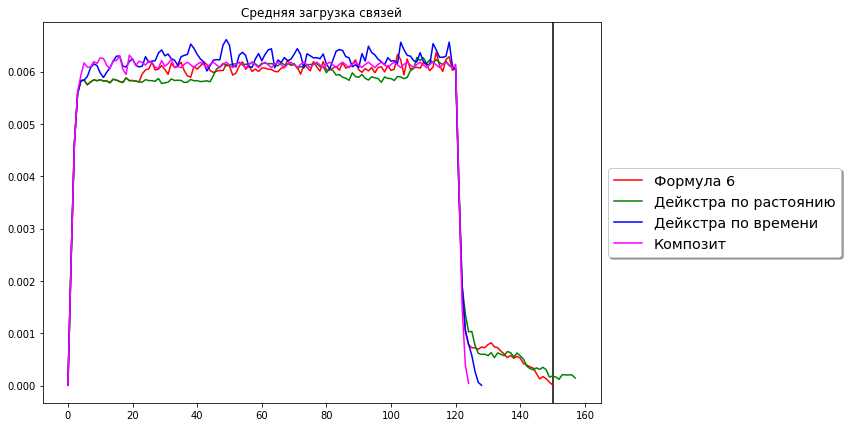

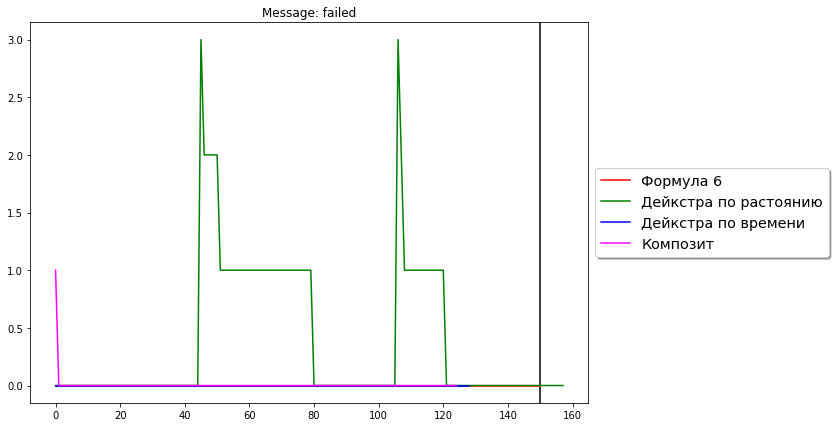

Средняя доля блокированных узлов: 0.0 	Формула 6
Средняя доля блокированных узлов: 0.002088607594936709 	Дейкстра по растоянию
Средняя доля блокированных узлов: 0.0 	Дейкстра по времени
Средняя доля блокированных узлов: 0.0 	Композит
Доставлено 12001 Потеряно 0.0000% -Формула 6
Доставлено 11941 Потеряно 0.5000% -Дейкстра по растоянию
Доставлено 12001 Потеряно 0.0000% -Дейкстра по времени
Доставлено 12000 Потеряно 0.0083% -Композит


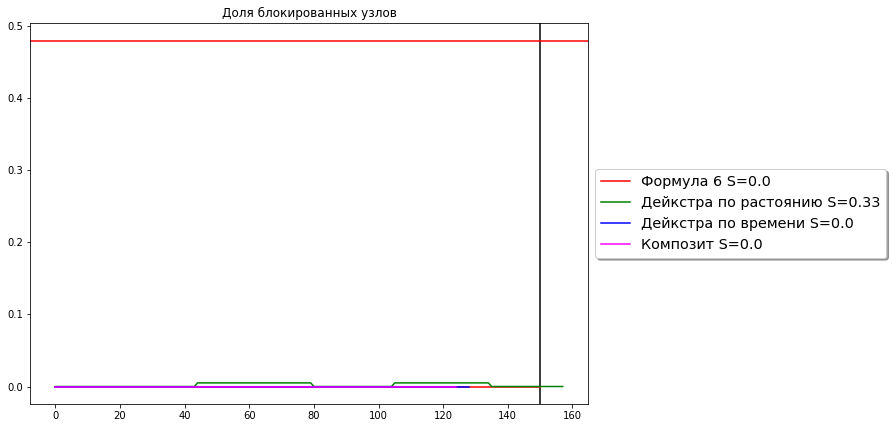

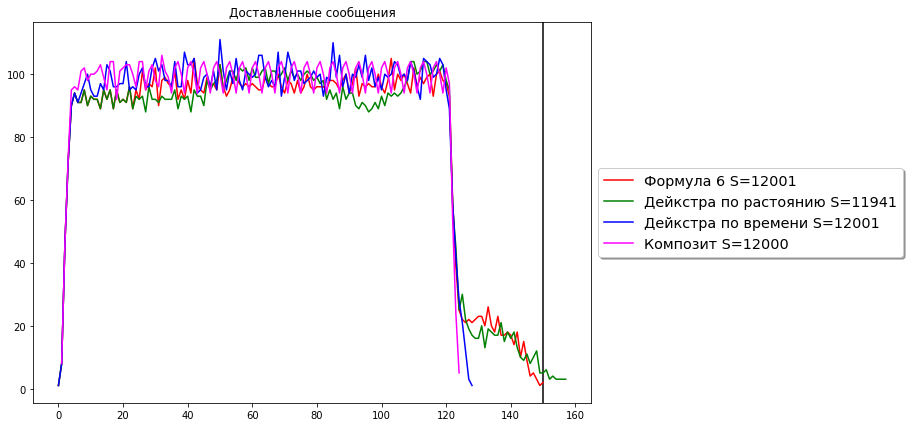

In [41]:
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime
import pandas as pd
import os
  
log_dir_path = os.path.abspath('..\\')+"\\Result"

log_tags = [
 {"tag":  "b096da9f-03a9-42e6-82d1-06957d2b25dc", "label": "Формула 6", "color": "red"},
 {"tag":  "85d79e65-6f01-4b28-9c6f-f81e8f5cf7f1", "label": "Дейкстра по растоянию", "color": "green"},
 {"tag":  "58110b03-6222-43b6-9351-6b539908da47", "label": "Дейкстра по времени", "color": "blue"},
 {"tag":  "f0759040-2fce-4e97-91e1-ef83b8855b92", "label": "Композит", "color": "magenta"},
 
]

files = [
    {"filename": "Netsim-Node-Metrics-queue-{log_tag}", "title": "Среднее число сообщений в очереди на узле на обработку" },
    {"filename": "Netsim-Node-Metrics-load-{log_tag}", "title": "Загрузка узлов" },
    {"filename": "Netsim-Connection-Metrics-queue-{log_tag}", "title": "Среднее число сообщений в очереди на связи"},
    {"filename": "Netsim-Connection-Metrics-load-{log_tag}", "title": "Средняя загрузка связей"},
    {"filename": "Netsim-Message-Metrics-failed-{log_tag}", "title": "Message: failed"},
]

filesBlocked = [
    {"filename": "Netsim-Node-Metrics-blocked-{log_tag}", "title": "Доля блокированных узлов" },
]

filesMessage = [
    {"filename": "Netsim-Message-Metrics-{log_tag}", "title": "Доставленные сообщения" },

]
          
def load_csv_file(path):
    file = open(path)
    data = file.readlines()
    splitted_data = [x.split(',') for x in data]
    return splitted_data, len(splitted_data[0])


def aggeregate_line(array):
    aggregated = [sum([float(y) for y in x])/len(x) for x in array]
    return aggregated, len(aggregated)


def plot(x, y, x2, y2, title):
    fig, ax = plt.subplots()
    ax.plot(x, y, label=title, c="blue")
    ax.plot(x2, y2, label=title, c="red")
    ax.set_title(title)
    plt.axvline(x=500, c="green")

def showStat():
    for file in files:
        fig, ax = plt.subplots()
        plt.rcParams['figure.figsize'] = [10, 7]
        ax.set_title(file['title'])
        plt.axvline(x=150, c="black")
       
        for log_tag in log_tags:
            data, line_len = load_csv_file(f"{log_dir_path}/{file['filename'].format(log_tag = log_tag['tag'])}")
            aggregated, count = aggeregate_line(data)
            ax.plot(range(0, count), aggregated, c=log_tag['color'], label=log_tag['label'])    
            legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), shadow=True, fontsize='x-large')
            legend.get_frame()
                                   
    plt.show()
                                           
def aggeregate_line_perc_node(array):
    aggregated = [sum([1 for y in x if float(y) > 0])/len(x) for x in array]
    return aggregated, len(aggregated)

def showStatBlocked():
    for file in filesBlocked:
        fig, ax = plt.subplots()
        plt.rcParams['figure.figsize'] = [10, 7]
        ax.set_title(file['title'])
        plt.axvline(x=150, c="black")
        plt.axhline(y=0.48, color='r', linestyle='-')
       
        for log_tag in log_tags:
            data, line_len = load_csv_file(f"{log_dir_path}/{file['filename'].format(log_tag = log_tag['tag'])}")
            aggregated, count = aggeregate_line_perc_node(data)
            summ = np.sum(aggregated)
            print('Средняя доля блокированных узлов: '+str(summ/count)+' \t'+log_tag['label'])
            ax.plot(range(0, count), aggregated, c=log_tag['color'], label=log_tag['label']+' S='+str(summ))    
            legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), shadow=True, fontsize='x-large')
            legend.get_frame()


def str2bool(v):
    return v.lower() in ("yes", "true", "t", "1")

def load_csv_file_message(path):
    file = open(path)
    data = file.readlines()
    t = datetime(2021,6,1,1)
   
    splitted_data = [(str2bool(x.split(',')[-2]), (datetime.strptime(x.split(',')[-1], '%d.%m.%Y %H:%M:%S\n')-t).total_seconds())  for x in data]
    df = pd.DataFrame(data=splitted_data,  columns=['Resived', 'Time']);
    total_count = len(df.index);
    df = df.loc[df['Resived'] == True]
    agg= df.groupby(['Time']).count()
     
    return agg['Resived'].to_numpy(), agg.index.get_level_values(0).to_numpy(), total_count

def showStatMessage():
    for file in filesMessage:
        fig, ax = plt.subplots()
        plt.rcParams['figure.figsize'] = [10, 7]
        ax.set_title(file['title'])
        plt.axvline(x=150, c="black")
       
        for log_tag in log_tags:
            data, line_len, all_count = load_csv_file_message(f"{log_dir_path}/{file['filename'].format(log_tag = log_tag['tag'])}")
            summ = np.sum(data);
            fall = (all_count-summ)*100/all_count;
            print('Доставлено '+str(summ)+' Потеряно '+ "{:3.4f}".format(fall)+'% -'+log_tag['label']);
            ax.plot(line_len, data, c=log_tag['color'], label=log_tag['label']+' S='+str(summ))    
            legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), shadow=True, fontsize='x-large')
            legend.get_frame()
    plt.show()
      
                             
showStat()
showStatBlocked();  
showStatMessage(); 

<strong>Quantity 300 </strong>

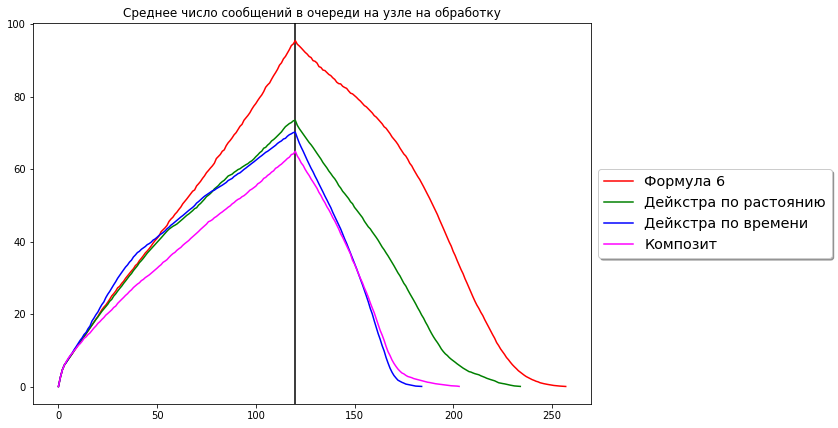

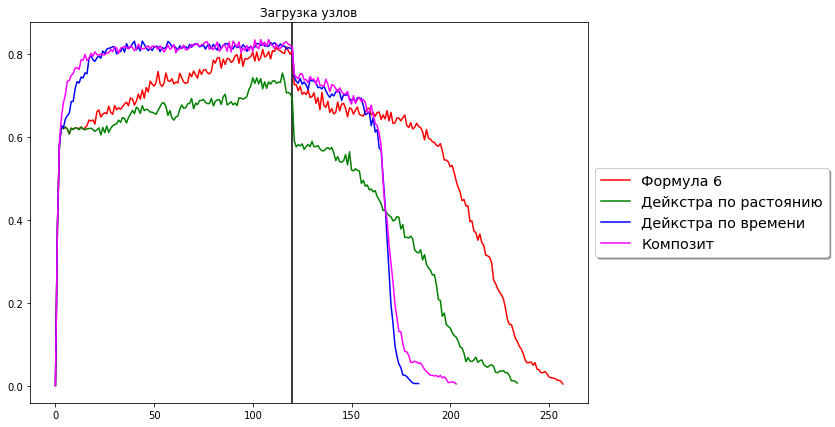

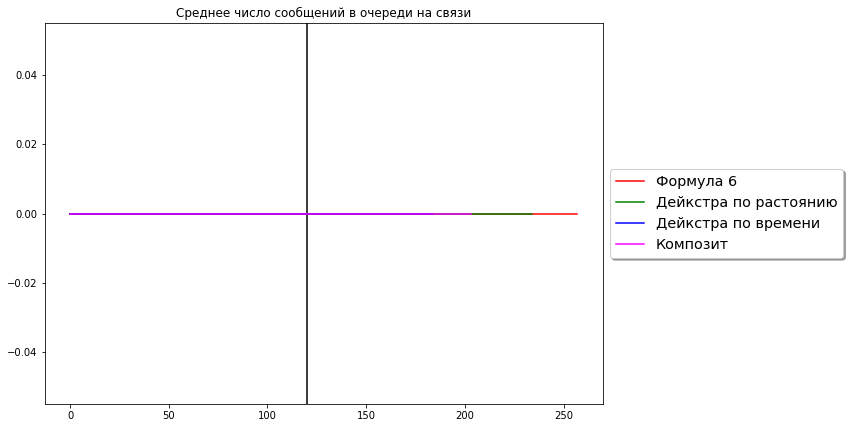

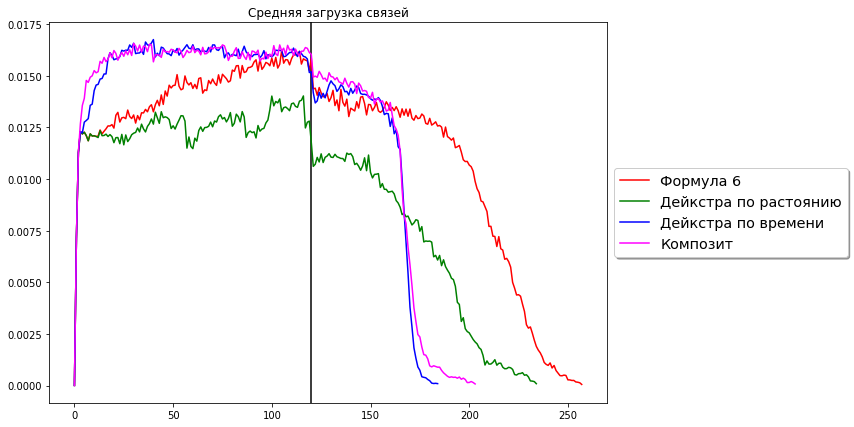

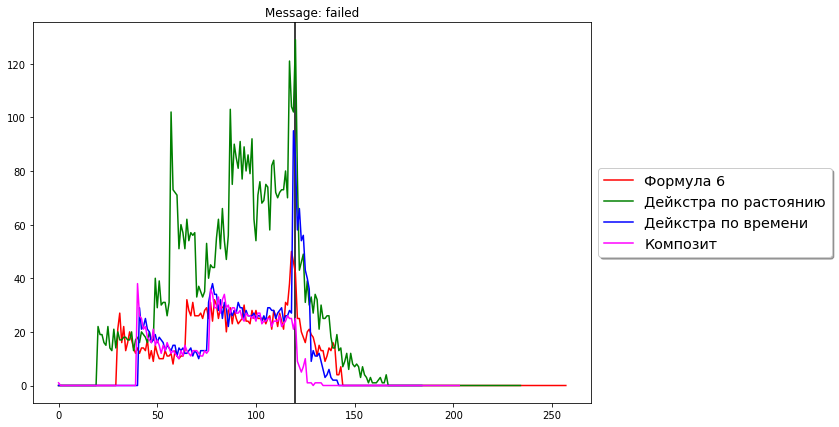

Доставлено 33639 Потеряно 6.5609% -Формула 6
Доставлено 30056 Потеряно 16.5134% -Дейкстра по растоянию
Доставлено 33632 Потеряно 6.5804% -Дейкстра по времени
Доставлено 34221 Потеряно 4.9443% -Композит


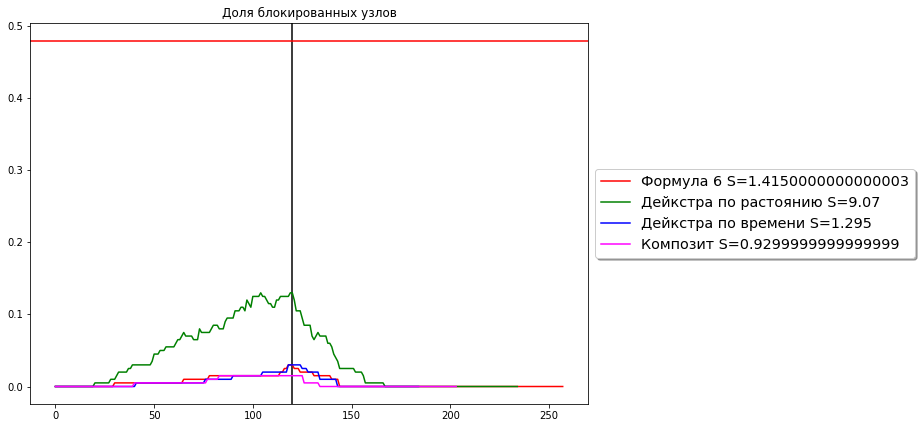

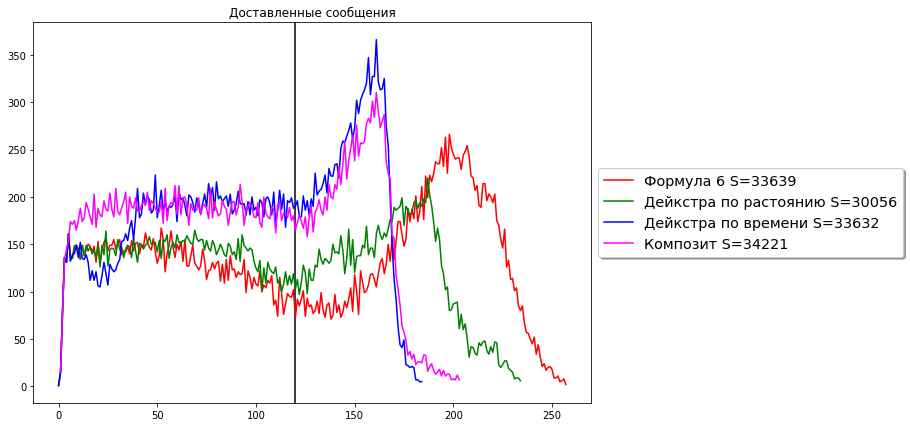

In [21]:
log_tags = [
 {"tag":  "49825f68-3477-425e-8727-d53df04e78ed", "label": "Формула 6", "color": "red"},
 {"tag":  "24311b09-d38e-47c8-86ed-e1a8a3bc9cb3", "label": "Дейкстра по растоянию", "color": "green"},
 {"tag":  "3214a262-5561-4a18-9936-4e9173e4ef58", "label": "Дейкстра по времени", "color": "blue"},
 {"tag":  "43523783-342c-4008-9afb-ec97a62d8e5f", "label": "Композит", "color": "magenta"},
]
showStat()
showStatBlocked();  
showStatMessage(); 

<strong>Quantity 500 </strong>
 

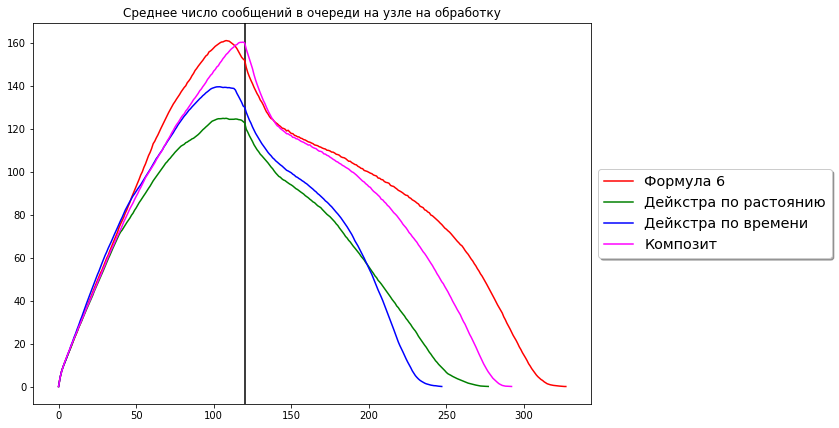

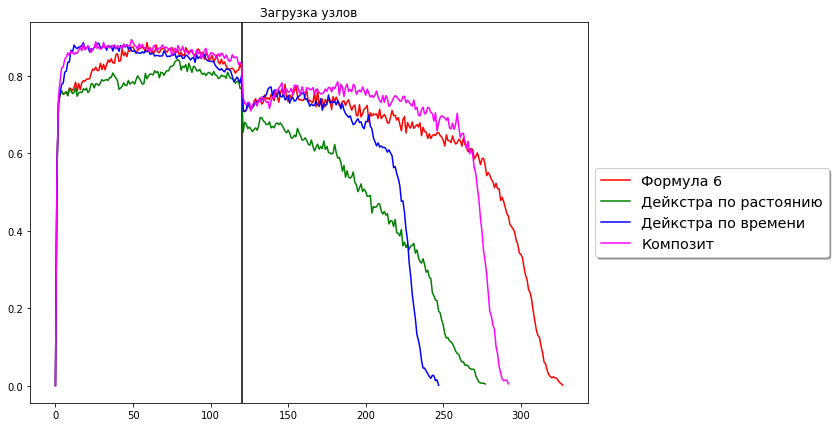

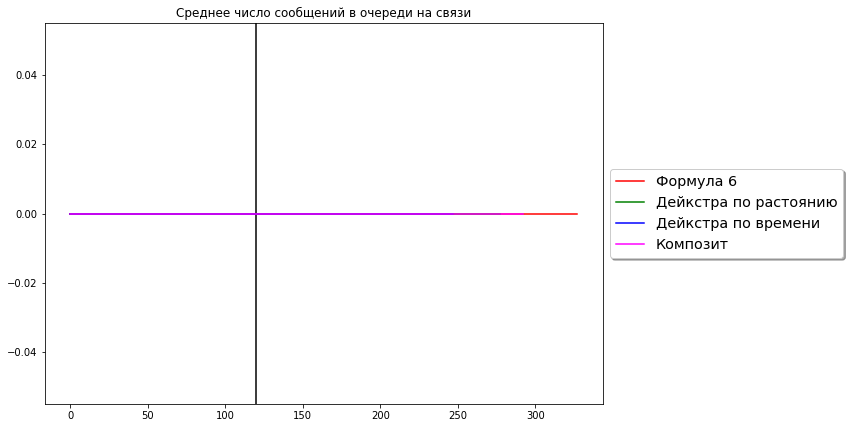

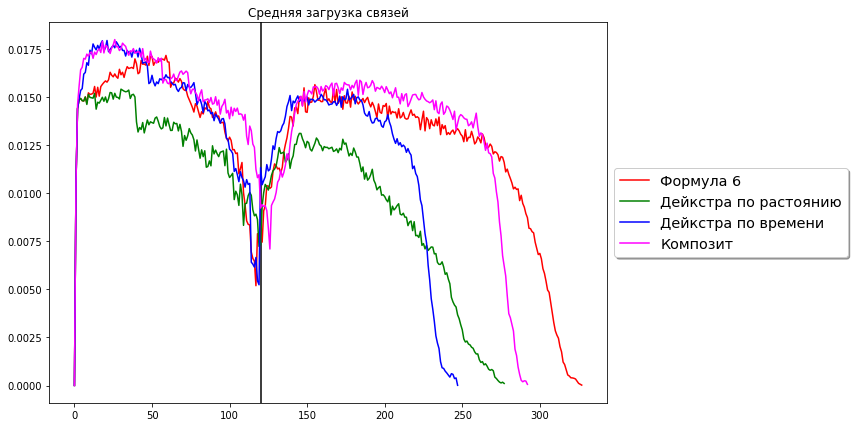

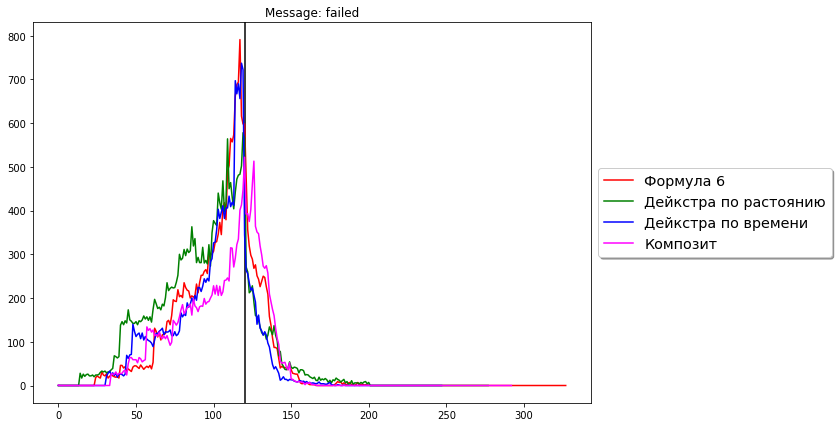

Доставлено 35189 Потеряно 41.3526% -Формула 6
Доставлено 31860 Потеряно 46.9009% -Дейкстра по растоянию
Доставлено 38161 Потеряно 36.3994% -Дейкстра по времени
Доставлено 39535 Потеряно 34.1094% -Композит


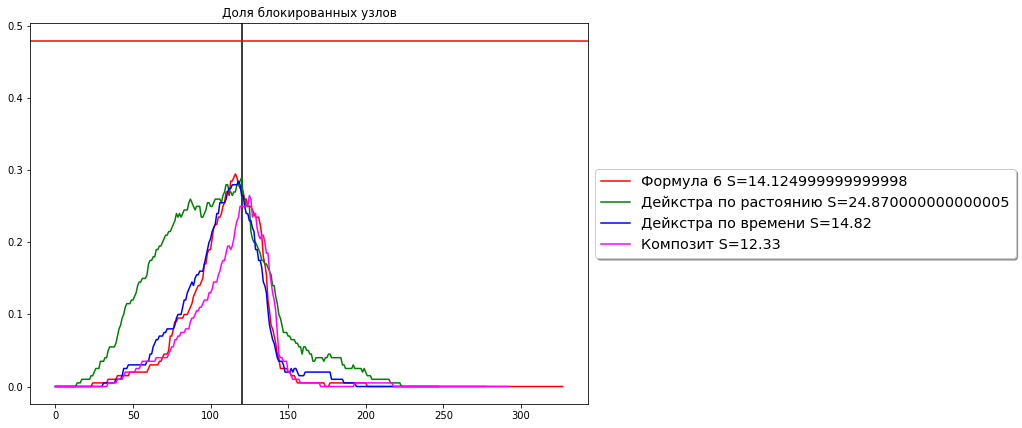

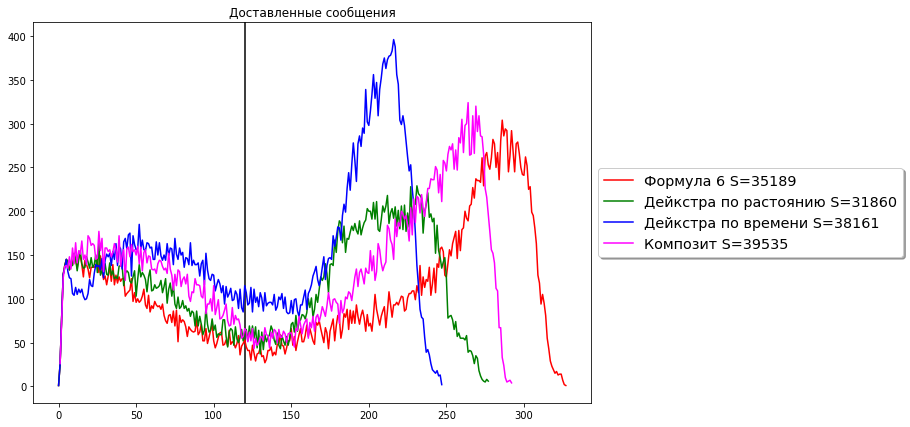

In [20]:
log_tags = [
 {"tag":  "3cf36e41-b525-43ea-b857-d7b38b8cdaf9", "label": "Формула 6", "color": "red"},
 {"tag":  "4fc6e563-f2c8-4533-b4d4-edb570df31e2", "label": "Дейкстра по растоянию", "color": "green"},
 {"tag":  "045df052-654c-41da-9a81-6ffb2e84fdc7", "label": "Дейкстра по времени", "color": "blue"},
 {"tag":  "2e188c41-5210-4e41-8ab1-4d8dad2011bf", "label": "Композит", "color": "magenta"},
   
    
]
showStat()
showStatBlocked();  
showStatMessage();

<strong>Quantity 1000 </strong>

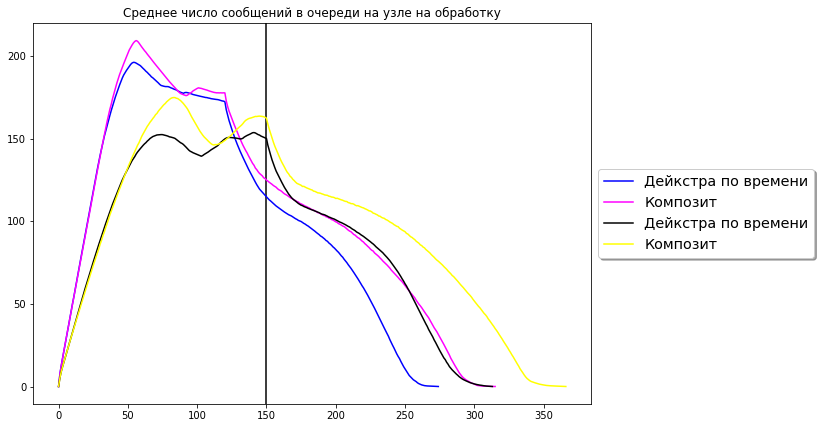

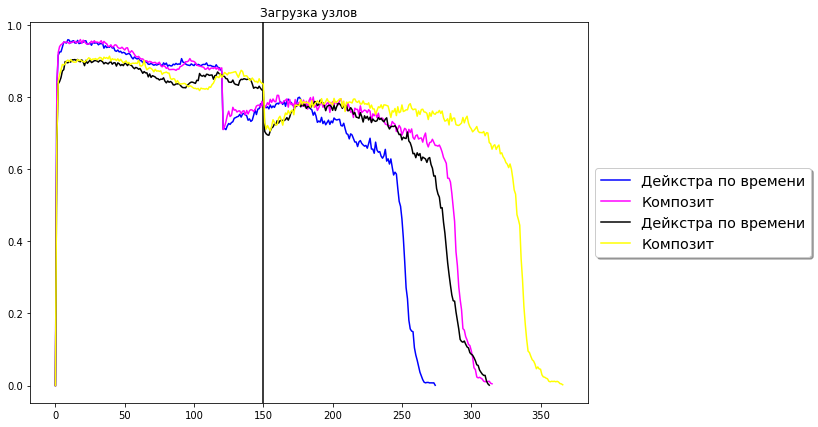

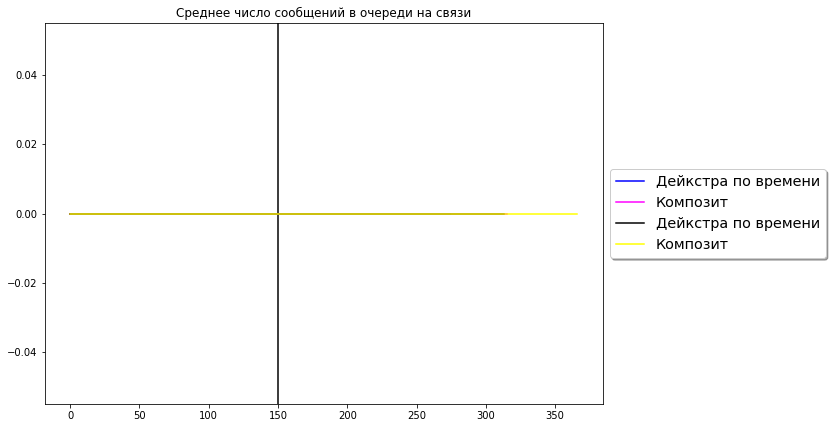

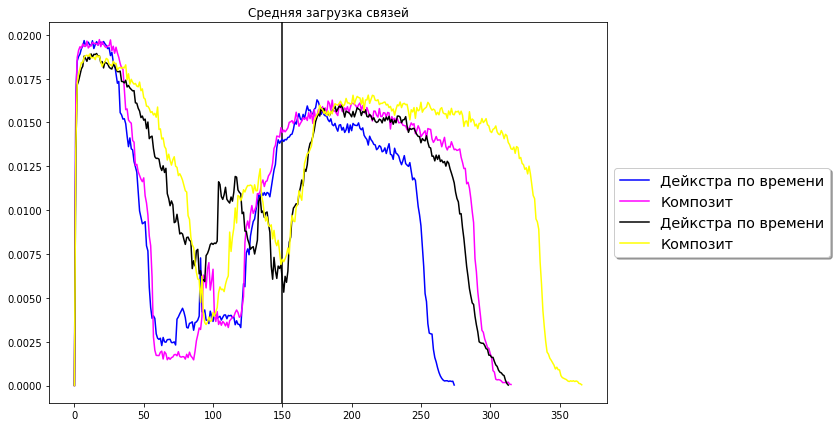

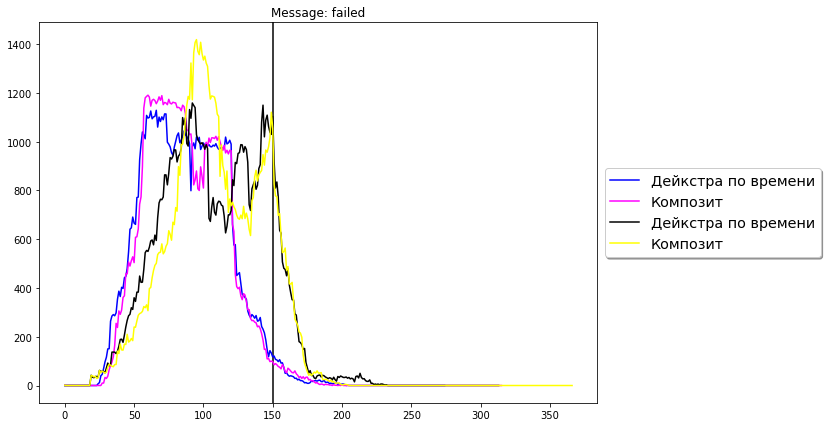

Средняя доля блокированных узлов: 0.15294545454545455 	Дейкстра по времени
Средняя доля блокированных узлов: 0.12590189873417723 	Композит
Средняя доля блокированных узлов: 0.11496815286624204 	Дейкстра по времени
Средняя доля блокированных узлов: 0.0884741144414169 	Композит
Доставлено 30187 Потеряно 74.8444% -Дейкстра по времени
Доставлено 31653 Потеряно 73.6227% -Композит
Доставлено 49712 Потеряно 66.8589% -Дейкстра по времени
Доставлено 52615 Потеряно 64.9236% -Композит


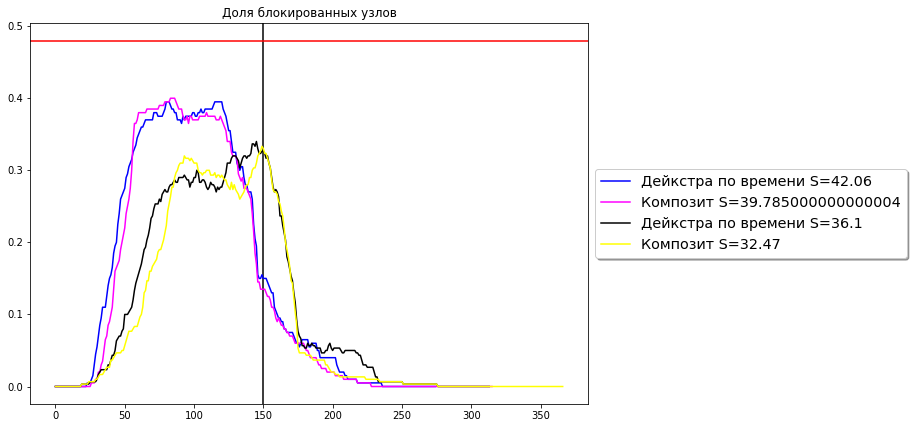

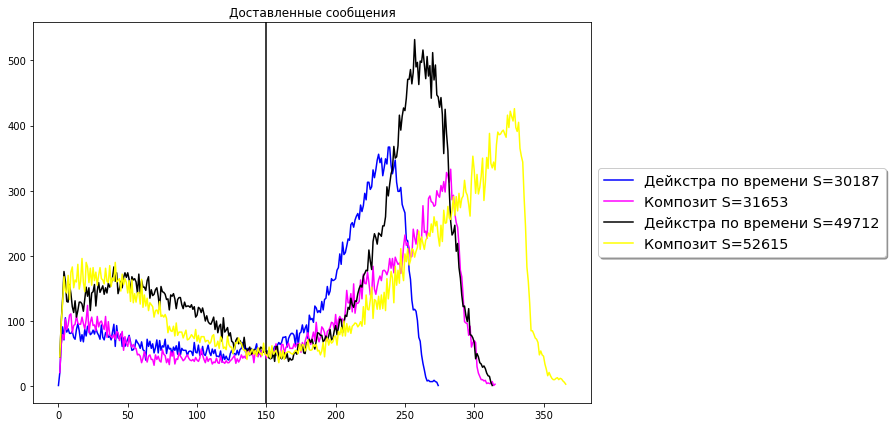

In [43]:
log_tags = [
# {"tag":  "4d3656e9-223a-4920-93f2-02c310aa3e3b", "label": "Формула 6", "color": "red"},
# {"tag":  "20fcc4c8-61a7-4849-a9fe-1e20d6177fc8", "label": "Дейкстра по растоянию", "color": "green"},
 {"tag":  "8e172ffa-0aa0-4555-98ed-a1f090e42f51", "label": "Дейкстра по времени", "color": "blue"},
 {"tag":  "77bcdcc0-ed23-41ce-b2c4-30b2b598e470", "label": "Композит", "color": "magenta"},
 {"tag":  "ffe05e9c-e510-46ff-a941-8375b122a2dc", "label": "Дейкстра по времени", "color": "black"},
 {"tag":  "1c1c991d-cb4a-4cc1-899b-b62a3c1caf1f", "label": "Композит", "color": "yellow"},
    
]
showStat()
showStatBlocked();  
showStatMessage();